In [1]:
### ALPHA AND PHI ###

import optical_systems
import dipole_source
import numpy as np
from matplotlib import pyplot as plt

# collection_NA = 0.95
collection_NA = 0.0001
#  collection_f = 0.005
collection_f = 0.15
# collection_NA = 0.1
# collection_f = 0.1
excitation_polarisation = (0,0)

phi_n = 1
alpha_n = 3

phi_range = np.linspace(0, np.pi, phi_n)
# alpha_range = np.linspace(0, np.pi/2, alpha_n)
alpha_range = np.linspace((np.pi/2)-(np.pi/6), np.pi/2, alpha_n)


# alpha_range = [0, np.pi/6, np.pi/3, np.pi/2]

r_theory = np.zeros((phi_n, alpha_n))
r = np.zeros((phi_n, alpha_n))

for a_i, alpha in enumerate(alpha_range):
    for p_i, phi in enumerate(phi_range):
        excitation_polarisation = (alpha, phi)
        print(alpha)
        r_t, r_theory_t = optical_systems.compare_single_dipole_theory(collection_NA, collection_f, excitation_polarisation, source=None, processes=3, plot=False)
        r_theory[p_i, a_i] = r_theory_t
        r[p_i, a_i] = r_t

fig = plt.figure(figsize=[18,6])

ax1 = fig.add_subplot(141)

pc1 = ax1.pcolormesh(alpha_range, phi_range, r,\
    shading='auto', vmin=0,vmax=1)
fig.colorbar(pc1, ax=ax1, fraction=0.045, pad=0.1)
ax1.set_title("Simulated anisotropy", fontsize=14)
ax1.set_xlabel(r'$\alpha$', fontsize=14)
ax1.set_ylabel(r'$\phi$', fontsize=14)

ax2 = fig.add_subplot(142)

pc2 = ax2.pcolormesh(alpha_range, phi_range, r_theory,\
    shading='auto', vmin=0,vmax=1)
fig.colorbar(pc2, ax=ax2, fraction=0.045)
ax2.set_title("Theoretical anisotropy", fontsize=14)
ax2.set_xlabel(r'$\alpha$', fontsize=14)
ax2.set_ylabel(r'$\phi$', fontsize=14)

ax3 = fig.add_subplot(143)

resid = r_theory-r
pc3 = ax3.pcolormesh(alpha_range, phi_range, resid,\
    shading='auto')
fig.colorbar(pc3, ax=ax3, fraction=0.045)
ax3.set_title("Residuals of anisotropy\n between theory and simulation", fontsize=14)
ax3.set_xlabel(r'$\alpha$', fontsize=14)
ax3.set_ylabel(r'$\phi$', fontsize=14)

ax4 = fig.add_subplot(144)

pc4 = ax4.pcolormesh(alpha_range, phi_range, abs(resid),\
    shading='auto')
fig.colorbar(pc4, ax=ax4, fraction=0.045)
ax4.set_title("Absolute residuals of anisotropy\n between theory and simulation", fontsize=14)
ax4.set_xlabel(r'$\alpha$', fontsize=14)
ax4.set_ylabel(r'$\phi$', fontsize=14)

fig.tight_layout()

1.0471975511965979
Generating 1 dipoles
Dipole: theta=60.0, phi_d=0.0
Tracing with 3 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 3.797287s
Time elapsed in addition 0.875000s
Tracing with 3 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 3.473712s
Time elapsed in addition 0.796875s
Graphical Anisotropy r = 0.9999999779469935
alpha: 1.0471975511965979
phi: 0.0
Theoretical anisotropy r = 1.0
theory intensities 2.4999999848063217e-09 0.0


ValueError: too many values to unpack (expected 2)

In [ ]:
### ALPHA ###

import optical_systems
import dipole_source
import numpy as np
from matplotlib import pyplot as plt

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

alpha_range = np.linspace(0, np.pi/2, 10)

# alpha_range = [0, np.pi/6, np.pi/3, np.pi/2]

r_theory = []
r = []

for alpha in alpha_range:
    excitation_polarisation = (alpha, 0)
    print(alpha)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(collection_NA, collection_f, excitation_polarisation, source=None, processes=2, plot=False)
    r.append(r_t)
    r_theory.append(r_theory_t)

fig = plt.figure(figsize=[10,6])

plt.plot(alpha_range, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(alpha_range, r_theory, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with NA=0.95 against dipole rotation in XY-plane (alpha)")
plt.xlabel("Alpha (rad)")
plt.ylabel("Anistropy r")
plt.legend()


fig_res = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
mask = abs(r_theory) > 1e-9
r = np.array(r)
pc_residuals = ((r_theory - r)/abs(r_theory))*mask

plt.plot(alpha_range, pc_residuals, linestyle=None, marker='o', label='Fractional residuals of r')

plt.title("Fractional residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (alpha)")
plt.xlabel("Alpha (rad)")
plt.ylabel("Fractional residuals of anistropy r")
plt.legend()

fig_res_abs = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
r = np.array(r)
residuals = r_theory - r

plt.plot(alpha_range, residuals, linestyle=None, marker='o', label='Residuals of r')

plt.title("Residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (alpha)")
plt.xlabel("Alpha (rad)")
plt.ylabel("Residuals of anistropy r")
plt.legend()

# optical_systems.compare_single_dipole_theory(collection_NA, collection_f, excitation_polarisation, source=None, processes=2)

In [ ]:
import optical_systems
import dipole_source
import numpy as np
from matplotlib import pyplot as plt

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

phi_range = np.linspace(0, 2*np.pi, 30)

r_theory = []
r = []

for phi in phi_range:
    excitation_polarisation = (0, phi)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(collection_NA, collection_f, excitation_polarisation, source=None, processes=2, plot=False)
    r.append(r_t)
    r_theory.append(r_theory_t)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(phi_range, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(phi_range, r_theory, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Anistropy r")
plt.legend()


fig_res = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
mask = abs(r_theory) > 1e-9
r = np.array(r)
pc_residuals = ((r_theory - r)/abs(r_theory))*mask

plt.plot(phi_range, pc_residuals, linestyle=None, marker='o', label='Fractional residuals of r')

plt.title("Fractional residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Fractional residuals of anistropy r")
plt.legend()

fig_res_abs = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
r = np.array(r)
residuals = r_theory - r

plt.plot(phi_range, residuals, linestyle=None, marker='o', label='Residuals of r')

plt.title("Residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Residuals of anistropy r")
plt.legend()

# optical_systems.compare_single_dipole_theory(collection_NA, collection_f, excitation_polarisation, source=None, processes=2)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(phi_range, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(phi_range, r_theory, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Anistropy r")
plt.legend()


fig_res = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
mask = abs(r_theory) > 1e-9
r = np.array(r)
pc_residuals = ((r_theory - r)/abs(r_theory))*mask

plt.plot(phi_range, pc_residuals, linestyle=None, marker='o', label='Fractional residuals of r')

plt.title("Fractional residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Fractional residuals of anistropy r")
plt.legend()

fig_res_abs = plt.figure(figsize=[10,6])

# ignore divide by zeroes
r_theory = np.array(r_theory)
r = np.array(r)
residuals = r_theory - r

plt.plot(phi_range, residuals, linestyle=None, marker='o', label='Residuals of r')

plt.title("Residual anisotropy between theory and simluation for single dipole \nwith NA=0.95 against dipole rotation in XY-plane (phi)")
plt.xlabel("Phi (rad)")
plt.ylabel("Residuals of anistropy r")
plt.legend()

Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 6.349049s


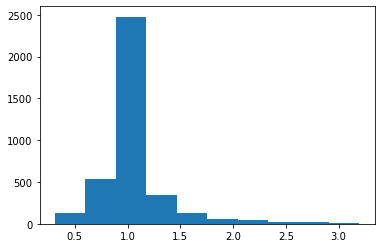

Time elapsed in addition 1.000000s
----------------------------------
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 3.619067s


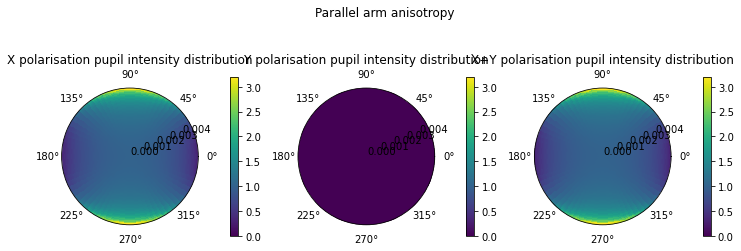

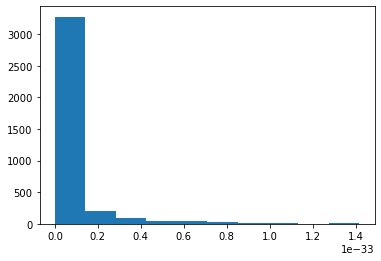

Time elapsed in addition 1.578125s
----------------------------------
Anisotropy r = 0.9224487193359809
alpha: 0
phi: 0
Theoretical anisotropy r = 0.9216541179239064
theory intensities 0.9838264837495119 0.02710882791650399
original rays time %f 14.187543392181396
Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
IN NEW UNIFORM RAYS


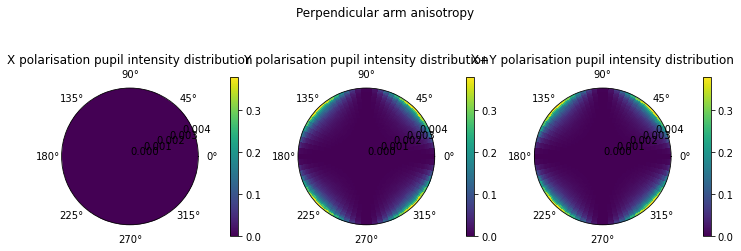

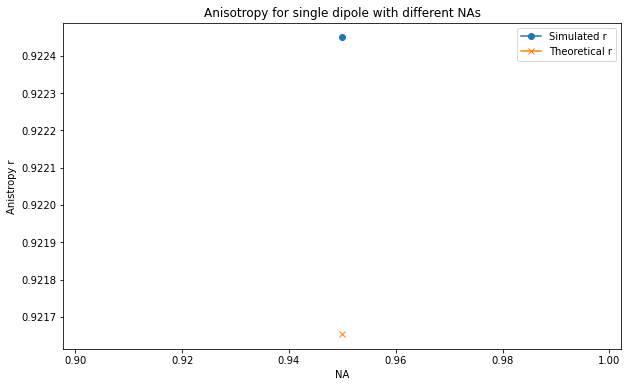

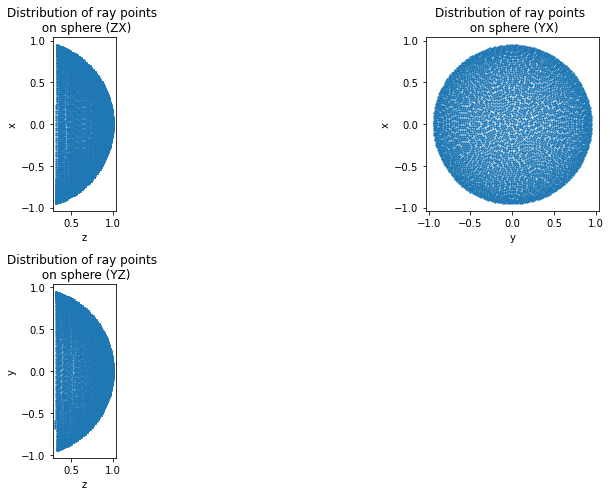

Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 7.249069s


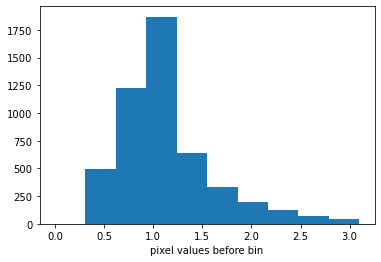

Time elapsed in bin section (time.time()) 0.174233s


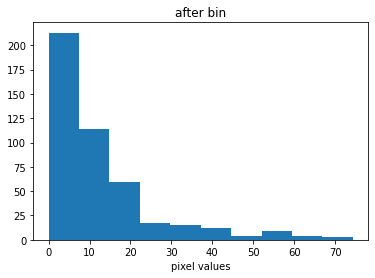

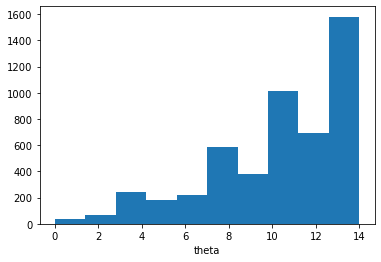

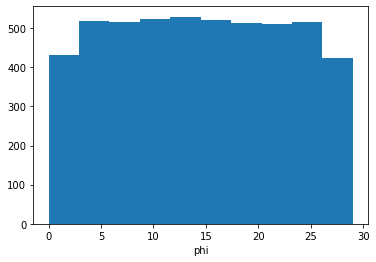

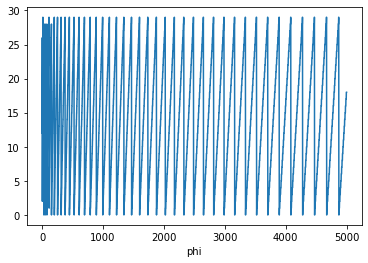

z:\User data\Leo Rowe-Brown\OPMsim\binning_detector.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Time elapsed in addition 1.625000s
----------------------------------
IN NEW UNIFORM RAYS
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 4.279162s


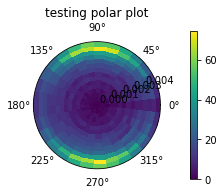

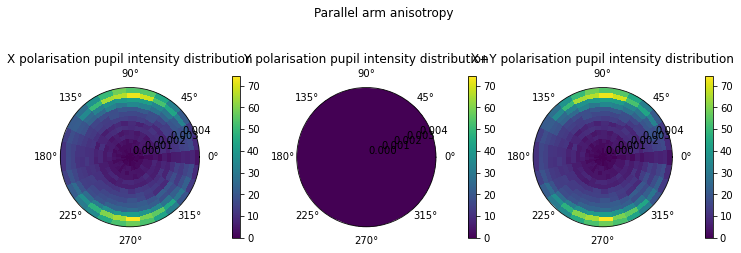

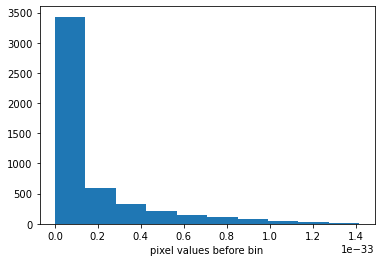

Time elapsed in bin section (time.time()) 1.124052s


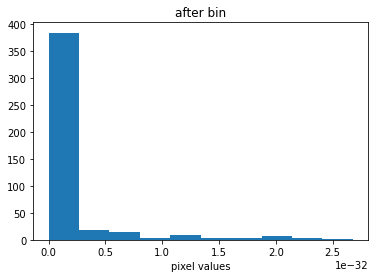

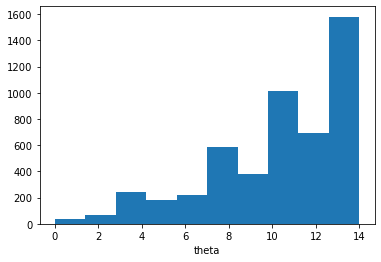

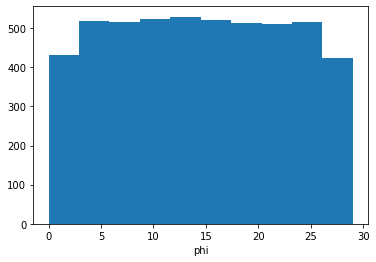

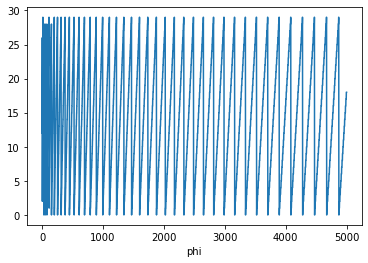

z:\User data\Leo Rowe-Brown\OPMsim\binning_detector.py:196: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Time elapsed in addition 2.734375s
----------------------------------
Anisotropy r = 0.8883523193698003
alpha: 0
phi: 0
Theoretical anisotropy r = 0.9216541179239064
theory intensities 0.9838264837495119 0.02710882791650399
with binning time %f 19.085978984832764


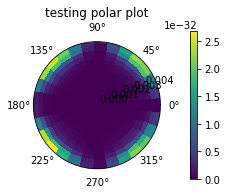

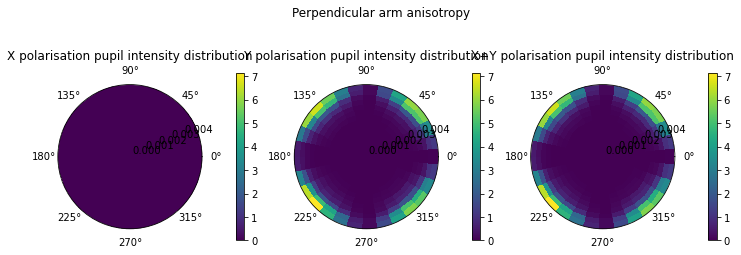

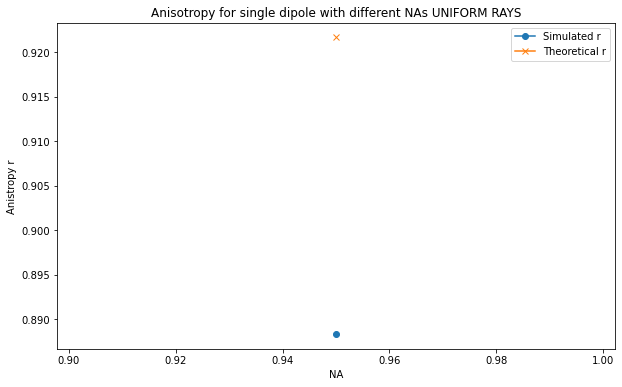

In [1]:
import optical_systems
import dipole_source
import time

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

method='uniform_phi_inbetween'

r_theory = []
r = []
NAs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95]
#NAs = [0.01, 0.3, 0.5, 0.8, 0.95]
NAs = [0.95]
excitation_polarisation = (0, 0)


start_original = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution=None, binning_detector=False)
    r.append(r_t)
    r_theory.append(r_theory_t)
time_original = time.time() - start_original
print("original rays time %f", time_original)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory, linestyle=None, marker='x', label='Theoretical r' )

plt.title("Anisotropy for single dipole with different NAs")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

## ---- UNIFORM RAYS ---- ##
r_theory_u = []
r_u = []
start_new_rays = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution='uniform', binning_detector=True) #rays_distribution='uniform', binning_detector=True)
    r_u.append(r_t)
    r_theory_u.append(r_theory_t)
time_new_rays = time.time() - start_new_rays
print("with binning time %f", time_new_rays)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs UNIFORM RAYS")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

In [ ]:
import optical_systems
import dipole_source

collection_f = 0.01
r_theory = []
r = []
NAs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95]
NAs = [0.95]
# NAs = [0.01, 0.5, 0.95]

for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_population_dipole_theory(NA, collection_f, dipole_count=50, source=None, processes=2, plot=True)
    r.append(r_t)
    r_theory.append(r_theory_t)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for dipole population under photoselection with different NAs")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

In [ ]:
import anisotropy
print(anisotropy.theoretical_anisotropy_population(0.95, return_intensities=False))
print(anisotropy.theoretical_anisotropy_population(0.5, return_intensities=False))
print(anisotropy.theoretical_anisotropy_population(0.1, return_intensities=False))
print(anisotropy.theoretical_anisotropy_population(0.01, return_intensities=False))
print(anisotropy.theoretical_anisotropy_population(0.001, return_intensities=False))

In [ ]:
import trace_system
import dipole_source
import graphics
import numpy as np
import scipy.interpolate as interp
import optical_elements

collection_NA = 0.95
collection_f = 0.005
second_NA = 0.95
second_f = 0.005
delta = np.pi/4

# source = dipole_source.DipoleSource()
# source.generate_photoselection_x(200)  # 100 dipoles
# source.get_rays(collection_NA, collection_f)
# source.generate_general_photoselection(400, [0, np.pi/4])

source = dipole_source.DipoleSource()
# source.generate_photoselection_x(200)  # 100 dipoles
# source.get_rays(collection_NA, collection_f)
# source.generate_general_photoselection(400, [0, 0])

method = 'uniform_phi_inbetween'
# source.generate_dipoles(100, method='uniform_rotate_gradual')
# source.generate_dipoles(100, method='uniform_rotate_90')
# source.generate_dipoles(100, method='random')
source.generate_dipoles(100, method=method)
source.classical_photoselection((0,0))
source.get_rays(collection_NA, collection_f, phi_points=50, theta_points=25)

pc_list = trace_system.two_objective_system(collection_NA, collection_f, second_NA, second_f, source, 'photoselection in x')

In [ ]:
import trace_system
import dipole_source
import graphics
import numpy as np
import scipy.interpolate as interp
import optical_elements

collection_NA = 0.95
collection_f = 0.005
second_NA = 0.95
second_f = 0.005
delta = np.pi/4

pc_list = trace_system.two_objective_system(collection_NA, collection_f, second_NA, second_f)


# trace_system.objective_qwp_system(collection_NA, collection_f, delta, second_NA, second_f)

In [ ]:
pc1 = pc_list[0]
pc1.

In [ ]:
import trace_system
import dipole_source
import graphics
import numpy as np
import scipy.interpolate as interp
import optical_elements

collection_NA = 0.95
collection_f = 0.005

elements = []
dipole_orientation=(0,0)
system = {'name': 'No objective [TEST], single x-dipole', 'elements': elements}
source = dipole_source.DipoleSource()
source.add_dipoles(dipole_orientation[0], dipole_orientation[1])
source.get_rays(collection_NA, collection_f)


pupil_ray = trace_system.trace_rays(system, source, collection_NA)
pupil_ray.plot("intensity obtained from rays, interp field not intensity", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

## original method ##
pupil = 'debug_curved_tf'
dp = source.dipole_ensemble[0]
(pupil_phi_range,pupil_sin_theta_range_old), pupil_vals_x, pupil_vals_y = \
dp.generate_pupil_field(collection_NA, collection_f, pupil='curved', return_coords=False,\
    rescale_energy=False, phi_points=100, sin_theta_points=50,\
    include_phase_factor=False)

intensity_x = np.real(pupil_vals_x)**2 + np.imag(pupil_vals_x)**2
intensity_y = np.real(pupil_vals_y)**2 + np.imag(pupil_vals_y)**2

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range_old, pupil_phi_range, intensity_x, intensity_y)
pupil_ray.plot("generate_pupil_field", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)
#############

resid_x = pupil_ray.data_x - intensity_x
resid_y = pupil_ray.data_y - intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range_old, pupil_phi_range, resid_x, resid_y)
pupil_ray.plot("resid", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

In [ ]:
# reproducing intensity in pupil between methods

import trace_system
import dipole_source
import graphics
import numpy as np
import scipy.interpolate as interp

def _rotate_efield(E_vec, phi, theta_polar):
    """ changes coordinate system according to k vector so that Ez = 0 """
    E_x_tf = E_vec[0]*np.cos(phi)*np.cos(theta_polar) + \
        E_vec[1]*np.sin(phi)*np.cos(theta_polar)\
        - E_vec[2]*np.sin(theta_polar)
    E_y_tf = -E_vec[0]*np.sin(phi) + E_vec[1]*np.cos(phi)
    # E_z_tf should equal 0
    E_z_tf = E_vec[0]*np.sin(theta_polar)*np.cos(phi)\
        + E_vec[1]*np.sin(theta_polar)*np.sin(phi) + E_vec[2]*np.cos(theta_polar)
    E_rot = [E_x_tf, E_y_tf, E_z_tf]

    return E_rot

collection_NA = 0.95
collection_f = 0.005

dipole_orientation=(0,0)

elements = []
system = {'name': 'No objective [TEST], single x-dipole', 'elements': elements}
source = dipole_source.DipoleSource()
# source.add_dipoles(0, np.pi/2)
source.add_dipoles(dipole_orientation[0], dipole_orientation[1])
source.get_rays(collection_NA, collection_f)
# for n in range(len(dp.ray_list)):
#     print(dp.ray_list[n].E_vec)
intensity_x = []
intensity_y = []

sin_theta_points = 50
phi_points = 100

pupil_theta_range = np.linspace(0,np.arcsin(collection_NA),sin_theta_points)

pupil_phi_range = np.linspace(0,2*np.pi,phi_points)

pupil_vals_x = np.zeros([len(pupil_theta_range)*len(pupil_phi_range)], dtype=np.complex_)
pupil_vals_y = np.zeros([len(pupil_theta_range)*len(pupil_phi_range)], dtype=np.complex_)

phi_list = np.zeros([len(pupil_theta_range) * len(pupil_phi_range)])
sin_theta_list = np.zeros([len(pupil_theta_range) * len(pupil_phi_range)])
theta_list = np.zeros([len(pupil_theta_range) * len(pupil_phi_range)])

import optical_elements
detector = optical_elements.Detector(curved=True, max_radius=collection_NA)
dipole = source.dipole_ensemble[0]
detector.add_field_legacy(dipole.ray_list)
detector_pupil = graphics.PupilPlotDetector(detector)
detector_pupil.plot("calling add_field outside trace_system", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

dipole_count = len(source.dipole_ensemble)
print("count", dipole_count)
j = 0
for n in range(dipole_count):
    dipole = source.dipole_ensemble[n]
    # trace rays then use detector
    for i in range(len(dipole.ray_list)):
        ray = dipole.ray_list[i]
        # I ASSUME dipole.ray_list itself is mutated..?
        phi = ray.phi
        theta = ray.theta
        # phi = 0 we preserve x and y
        E_vec = ray.E_vec
        
        E_vec = _rotate_efield(E_vec, phi,  theta)
        # should E_z really be zero? Non TEM modes in air? No
        if E_vec[2]**2 > 1e-3*(E_vec[0]**2 + E_vec[1]**2 + E_vec[2]**2):
            print("Ez =", E_vec[2], "Ex =", E_vec[0], "E_y =", E_vec[1])
            raise Exception("E_z is not zero in ray's frame!")

        # now convert x and y rotated basis back to lab basis for meaningful
        # polarisation

        # xy field (polarisation) transformation to recover original x-y basis
        E_vec_x = E_vec[0]*np.cos(phi) - E_vec[1]*np.sin(phi)
        E_vec_y = E_vec[0]*np.sin(phi) + E_vec[1]*np.cos(phi)

        E_vec[0] = E_vec_x
        E_vec[1] = E_vec_y
        
        pupil_vals_x[j] = E_vec[0]
        pupil_vals_y[j] = E_vec[1]

        phi_list[j] = phi
        sin_theta_list[j] = np.sin(theta)
        theta_list[j] = theta

        j += 1

points = (phi_list, sin_theta_list)
pupil_sin_theta_range = np.sin(pupil_theta_range)
# then interpolate
linear_sine_space = np.linspace(0, max(sin_theta_list), sin_theta_points)

grid_p, grid_r = np.meshgrid(pupil_phi_range, linear_sine_space)

interp_efield_x = interp.griddata(points, np.real(pupil_vals_x), (grid_p, grid_r),\
    method='cubic',fill_value=0)
interp_efield_y = interp.griddata(points, np.real(pupil_vals_y), (grid_p, grid_r),\
    method='cubic',fill_value=0)

pupil_intensity_x = np.real(pupil_vals_x)**2 + np.imag(pupil_vals_x)**2
pupil_intensity_y = np.real(pupil_vals_y)**2 + np.imag(pupil_vals_y)**2

interp_intensity_from_field_x = interp_efield_x**2
interp_intensity_from_field_y = interp_efield_y**2

interp_intensity_x = interp.griddata(points, pupil_intensity_x, (grid_p, grid_r),\
    method='cubic',fill_value=0)
interp_intensity_y = interp.griddata(points, pupil_intensity_y, (grid_p, grid_r),\
    method='cubic',fill_value=0)

print(len(pupil_intensity_x))

# skip interpolation FOR TESTING
# interp_intensity_x = pupil_intensity_x
# interp_intensity_y = pupil_intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, interp_intensity_x, interp_intensity_y)
pupil_ray.plot("intensity obtained from rays", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, interp_intensity_from_field_x, interp_intensity_from_field_y)
pupil_ray.plot("intensity obtained from rays, interp field not intensity", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

print(np.shape(interp_intensity_from_field_x))

## original method ##
pupil = 'debug_curved_tf'
dp = source.dipole_ensemble[0]
(pupil_phi_range,pupil_sin_theta_range_old), pupil_vals_x, pupil_vals_y = \
dp.generate_pupil_field(collection_NA, collection_f, pupil='curved', return_coords=False,\
    rescale_energy=False, phi_points=100, sin_theta_points=50,\
    include_phase_factor=False)
import plot_multiple_dipoles
intensity_x = np.real(pupil_vals_x)**2 + np.imag(pupil_vals_x)**2
intensity_y = np.real(pupil_vals_y)**2 + np.imag(pupil_vals_y)**2
# np.savetxt('xdata_method1.csv', intensity_x, delimiter=',')
# plot_multiple_dipoles.plot_pupil('generate_pupil_field()', (pupil_phi_range,pupil_sin_theta_range),\
#    intensity_x, intensity_y)
print(np.shape(intensity_x))
print("phi", len(pupil_phi_range))
print("sin", len(pupil_sin_theta_range_old))

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range_old, pupil_phi_range, intensity_x, intensity_y)
pupil_ray.plot("generate_pupil_field", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)
#############

"""
## original method ##

resid_x = interp_intensity_x - intensity_x
resid_y = interp_intensity_y - intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, resid_x, resid_y)
pupil_ray.plot("resid", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

resid_x = interp_intensity_from_field_x - intensity_x
resid_y = interp_intensity_from_field_y - intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, resid_x, resid_y)
pupil_ray.plot("resid field interp", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)
#############
"""

pupil = trace_system.trace_rays(system, source, collection_NA)
pupil.plot("ray and detector", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

pupil2 = trace_system.trace_rays(system, source, collection_NA, method2=True)
pupil2.plot("ray and detector method2", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

pupil3 = trace_system.trace_rays(system, source, collection_NA, method2=False, legacy=True)
pupil3.plot("ray and detector legacy method", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

# print(pupil3.data_x)
# print(intensity_x)

resid_x = pupil.data_x - intensity_x
resid_y = pupil.data_y - intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, resid_x, resid_y)
pupil_ray.plot("resid", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

resid_x2 = detector_pupil.data_x - intensity_x
resid_y2 = detector_pupil.data_y - intensity_y

pupil_ray = graphics.PupilPlotObject(pupil_sin_theta_range, pupil_phi_range, resid_x2, resid_y2)
pupil_ray.plot("resid", save_dir=None, file_name=None,\
    show_prints=False, plot_arrow=None)

In [ ]:
import trace_system

collection_NA = 0.95
collection_f = 0.005

#0.95 NA

trace_system.two_objective_system(collection_NA, collection_f)

In [ ]:
import trace_system
import numpy as np

collection_NA = 0.95
#collection_NA = 0.85
collection_f = 0.005
# collection_f = 1

#0.95 NA

trace_system.no_objective_system(collection_NA, collection_f, dipole_orientation=(0,np.pi/4))